## Query all EPN-TAP services

We show here how to send the same EPN-TAP query to all existing EPN-TAP services. This will retrieve all results from many independent services / institutes, including those unknown to the user.

EPN-TAP services are first identified from the IVOA registry. Then the query is sent to all of them in sequence.

### Grab a list of all EPN-TAP services from the registry

In [1]:
import pyvo as vo
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.table import vstack
import urllib
from astroquery.utils.tap.core import TapPlus  

In [2]:
query = "SELECT table_name, access_url, ivoid FROM (SELECT ivoid, table_name, table_utype FROM rr.res_table WHERE table_utype LIKE 'ivo://vopdc.obspm/std/epncore%' OR table_utype LIKE 'ivo://ivoa.net/std/epntap#table-2.%' OR table_utype='ivo.//vopdc.obspm/std/epncore#schema-2.0' ) AS epntables NATURAL JOIN rr.capability NATURAL JOIN rr.interface WHERE standard_id = 'ivo://ivoa.net/std/tap' AND intf_role='std'"


In [3]:
registry_url = "http://voparis-rr.obspm.fr/tap"

In [4]:
services = TapPlus(url=registry_url)
job = services.launch_job(query)
r1 = job.get_results()
# lists all published EPN-TAP services:
r1


table_name,access_url,ivoid
object,object,object
thmsm.epn_core,http://dorotka.ufa.cas.cz//tap,ivo://iap/tap
cpstasm.epn_core,http://dorotka.ufa.cas.cz//tap,ivo://iap/tap
soir.epn_core,http://vespa-ae.oma.be/tap,ivo://bira-iasb/tap
nomad.epn_core,http://vespa-ae.oma.be/tap,ivo://bira-iasb/tap
gem_mars.epn_core,http://vespa-ae.oma.be/tap,ivo://bira-iasb/tap
parsec.epn_core,http://parsec-europlanet.eu:81/tap,ivo://aoi.amu.parsec/tap
lars.epn_core,http://dachs.sdc.leibniz-kis.de/tap,ivo://leibniz-kis/tap
gris.epn_core,http://dachs.sdc.leibniz-kis.de/tap,ivo://leibniz-kis/tap
chrotel.epn_core,http://dachs.sdc.leibniz-kis.de/tap,ivo://leibniz-kis/tap


**This lists the available services; table name and server url are printed for the first entry**

In [5]:
# accessing elt: 
print(r1['table_name'])
print(r1['table_name'][0])
print(r1['access_url'][0])


             table_name            
-----------------------------------
                     thmsm.epn_core
                   cpstasm.epn_core
                      soir.epn_core
                     nomad.epn_core
                  gem_mars.epn_core
                    parsec.epn_core
                      lars.epn_core
                      gris.epn_core
                   chrotel.epn_core
pl610_dynamic_spectra_vira.epn_core
                                ...
                       vir.epn_core
                      ndcs.epn_core
                     cemls.epn_core
                    amdadb.epn_core
                   illu67p.epn_core
               transplanet.epn_core
             mp3c_best_epn.epn_core
                    climso.epn_core
                    spicam.epn_core
                    abs_cs.epn_core
Length = 290 rows
thmsm.epn_core
http://dorotka.ufa.cas.cz//tap


### Sending a simple query to all services

Here we're looking for values of an optional parameter. This will just print the table name if the parameter is not provided, or the number of values otherwise.

**The query is a bit long to execute, due to the large number of EPN-TAP services published in the registry (in January 2024)**

In [6]:
for ii in range((r1['table_name']).shape[0]):
	Stable_name = r1['table_name'][ii]
	Service_url = r1['access_url'][ii]
	query2 = "SELECT distinct spatial_origin FROM " + Stable_name
	answers = TapPlus(url=Service_url)
	# remove one uncorrect entry
	if r1['access_url'][ii] == 'http://vo-node1.iaps.inaf.it/tap': 
		continue
	# skip the largest server
	if r1['access_url'][ii] == 'https://vo-pds-ppi.igpp.ucla.edu/tap': 
		continue
	try:
		job2 = answers.launch_job(query2)
		r2 = job2.get_results()
		Stable_name, r2[0][0]
	except:
		print(Stable_name) # command required here


thmsm.epn_core
cpstasm.epn_core
parsec.epn_core
pl610_dynamic_spectra_vira.epn_core
pl610_dynamic_spectra_taua.epn_core
pl610_dynamic_spectra_sun.epn_core
pl610_dynamic_spectra_jupiter.epn_core
pl610_dynamic_spectra_cyga.epn_core
pl610_dynamic_spectra_casa.epn_core
pl610_dynamic_spectra.epn_core
nqmaps.epn_core
iriwarsaw.epn_core
ionosondes.epn_core
h2tecmaps.epn_core
hrsc3nd.epn_core
sbnaf.epn_core
mdisc.epn_core
jasmin.epn_core
omega_maps.epn_core
omega_cubes.epn_core
eit_syn.epn_core
vcd.epn_core
mcd.epn_core
mars_dust.epn_core
usgs_wms.epn_core
planmap.epn_core
planetserver_crism.epn_core
mars_craters_lagain.epn_core
mars_craters.epn_core
tfcat.epn_core
cassini_rpws.epn_core
cassini_jupiter.epn_core
hfc1t3.epn_core
bass2000.epn_core
pretharsis.epn_core
exotopo.epn_core
mp3c_best_epn.epn_core
pvol.epn_core
uset_sunspot_group.epn_core
uset_sunspot_drawing.epn_core
vvex.epn_core
vims_satellites.epn_core
venus_craters.epn_core
usgs_wms.epn_core
tnosarecool.epn_core
titan_profiles.epn_c

### Sending a more realistic query to all services

In [7]:
# first define a result table 
# actually doesn't work - all grouped in first column later
d = {
    'service_title': [''],
    'granule_uid': [''],
    'time_min': [0.],
    'solar_longitude_min': [0.],
    'solar_longitude_max': [0.]
}
import pandas as pd
df = pd.DataFrame(d)

Then sends a more realistic query to all services and concatenate results - we're asking for any data during a specific season on Mars, whatever the year

In [8]:
for ii in range((r1['table_name']).shape[0]):
	Stable_name = r1['table_name'][ii]
	Service_url = r1['access_url'][ii]
	query2 = "SELECT * FROM " + Stable_name + " WHERE target_name = 'Mars' and solar_longitude_min >= 30 and solar_longitude_max <= 40"
	answers = TapPlus(url=Service_url)
	# remove one uncorrect entry
	if r1['access_url'][ii] == 'http://vo-node1.iaps.inaf.it/tap': 
		continue
	# skip the largest server
	if r1['access_url'][ii] == 'https://vo-pds-ppi.igpp.ucla.edu/tap': 
		continue
	try:
		job2 = answers.launch_job(query2)
		r2 = job2.get_results()
		print(Stable_name , r2['service_title'].shape[0] )
	# cumulative results
		df = vstack([df, r2['service_title','granule_uid','time_min', 'solar_longitude_min','solar_longitude_max']], join_type='outer')
	except:
		print(Stable_name ) # a command is required

thmsm.epn_core
cpstasm.epn_core
soir.epn_core 0
nomad.epn_core 371
gem_mars.epn_core 2000
parsec.epn_core
lars.epn_core
gris.epn_core
chrotel.epn_core
pl610_dynamic_spectra_vira.epn_core
pl610_dynamic_spectra_taua.epn_core
pl610_dynamic_spectra_sun.epn_core
pl610_dynamic_spectra_jupiter.epn_core
pl610_dynamic_spectra_cyga.epn_core
pl610_dynamic_spectra_casa.epn_core
pl610_dynamic_spectra.epn_core
nqmaps.epn_core
iriwarsaw.epn_core
ionosondes.epn_core
h2tecmaps.epn_core
hrsc3nd.epn_core 169
sbnaf.epn_core
mdisc.epn_core


jasmin.epn_core
omega_maps.epn_core
omega_cubes.epn_core
gaia_dem.epn_core
eit_syn.epn_core
vcd.epn_core
mcd.epn_core 0
mars_dust.epn_core


usgs_wms.epn_core
planmap.epn_core
planetserver_crism.epn_core
mars_craters_lagain.epn_core
mars_craters.epn_core
tfcat.epn_core
cassini_rpws.epn_core
cassini_jupiter.epn_core
hfc1t3.epn_core
hfc1ar.epn_core
bass2000.epn_core
pretharsis.epn_core
exotopo.epn_core
mp3c_best_epn.epn_core
pvol.epn_core
uset_sunspot_group.epn_core
uset_sunspot_drawing.epn_core
rob_spoca_ch.epn_core
vvex.epn_core 0


voccdb.epn_core
vims_satellites.epn_core
venus_craters.epn_core
usgs_wms.epn_core
tnosarecool.epn_core
titan_profiles.epn_core
spectro_stars.epn_core
spectro_planets.epn_core
spectro_asteroids.epn_core
planets.epn_core
moonsprop.epn_core
meteor_showers.epn_core 2
mercury_craters.epn_core
mars_craters_lagain.epn_core
mars_craters.epn_core
m4ast.epn_core
lunar_craters.epn_core
iks.epn_core
hst_planeto.epn_core
gmap.epn_core
exoplanet.epn_core
dynastvo.epn_core
crism_speclib.epn_core
bdip.epn_core
basecom.epn_core
apis.epn_core
mpc.epn_core
amdadb.epn_core
illu67p.epn_core
transplanet.epn_core
mp3c_best_epn.epn_core
climso.epn_core
spicam.epn_core 118
abs_cs.epn_core


In [9]:
df

col0,service_title,granule_uid,time_min,solar_longitude_min,solar_longitude_max
,,,d,deg,deg
object[5],object,object,float64,float64,float64
.. 0.0,--,--,--,--,--
-- .. --,nomad,20190526_141013_2p0a_SO_A_I_148_co2.xml,2458630.0904282406,30.5999,30.5999
-- .. --,nomad,20190527_015725_2p0a_SO_A_I_148_co2.xml,2458630.581539352,30.8249,30.8249
-- .. --,nomad,20190528_100629_2p0a_SO_A_E_148_co2.xml,2458631.9211689816,31.4383,31.4383
-- .. --,nomad,20190601_014746_2p0a_SO_A_I_148_co2.xml,2458635.574837963,33.1062,33.1062
-- .. --,nomad,20190603_084814_2p0a_SO_A_I_148_co2.xml,2458637.866828704,34.1496,34.1496
-- .. --,nomad,20190604_121820_2p0a_SO_A_I_148_co2.xml,2458639.0127314813,34.6704,34.6704
-- .. --,nomad,20190605_115245_2p0a_SO_A_I_148_co2.xml,2458639.9949652776,35.1163,35.1163


Then plot cumulative results

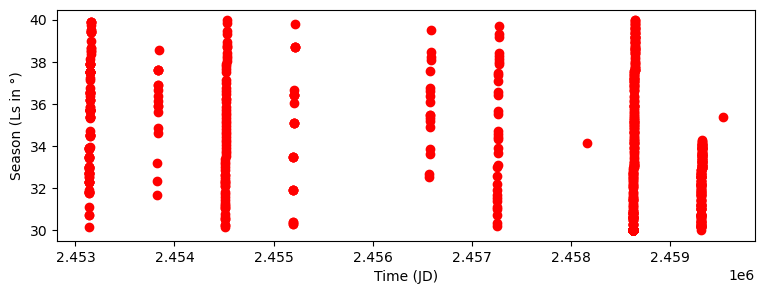

In [10]:
plt.figure(figsize=(9, 3))
plt.xlabel('Time (JD)')
plt.ylabel('Season (Ls in °)')
p=plt.plot(df['time_min'], df['solar_longitude_max'], 'ro')
p3= plt.show()
